In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
# exercise 1

with open('nc_051526_1.fasta', 'r') as f:
    genome = f.readlines()[1:]
    genome = [x.strip() for x in genome]
    seq = ''.join(genome)

In [3]:
# exercise 2

char = set(seq)
possible_triplets = set()

for a in char:
    for b in char:
        for c in char:
            codons = a+b+c
            rev = c+b+a
            if not rev in possible_triplets:
                possible_triplets.add(codons)
                
print(possible_triplets)

{'CGG', 'TTT', 'CGC', 'CGA', 'CCC', 'CCA', 'CAG', 'CCG', 'CAA', 'CAC', 'CGT', 'CAT', 'CCT', 'AGA', 'ACT', 'AGG', 'AAT', 'GCG', 'CTG', 'GAG', 'GGT', 'CTC', 'CTA', 'TGT', 'ACG', 'AAA', 'ACA', 'AAG', 'AGT', 'GAT', 'GGG', 'TAT', 'CTT', 'GCT', 'TCT', 'ATT', 'GTG', 'GTT', 'ATG', 'ATA'}


In [4]:
# exercise 3

def occurrences(s:str, triplet)-> int:
    """
    >>> occurrences('CAATAATCC', 'AAT')
    3
    >>> occurrences('AAAAAAA', 'AAA')
    5
    """
    assert len(s) >= 3 and len(triplet)==3
    
    rev = triplet[-1::-1]
    count = 0
    
    for i in range(0, len(s)-2):
        if s[i:i+3] == triplet or s[i:i+3] == rev:
            count += 1
            
    return count 


In [5]:
# exercise 4

df = pd.DataFrame(index=possible_triplets)

occ = df.index.map(lambda x: occurrences(seq, x))

df['Count'] = occ
df.loc['AAA']['Count'] == 446

True

In [8]:
# exercise 5
df['Even'] = df['Count']%2 == 0
df.head()

,Count,Even
CGG,282,True
TTT,167,False
CGC,160,True
CGA,499,False
CCC,672,True


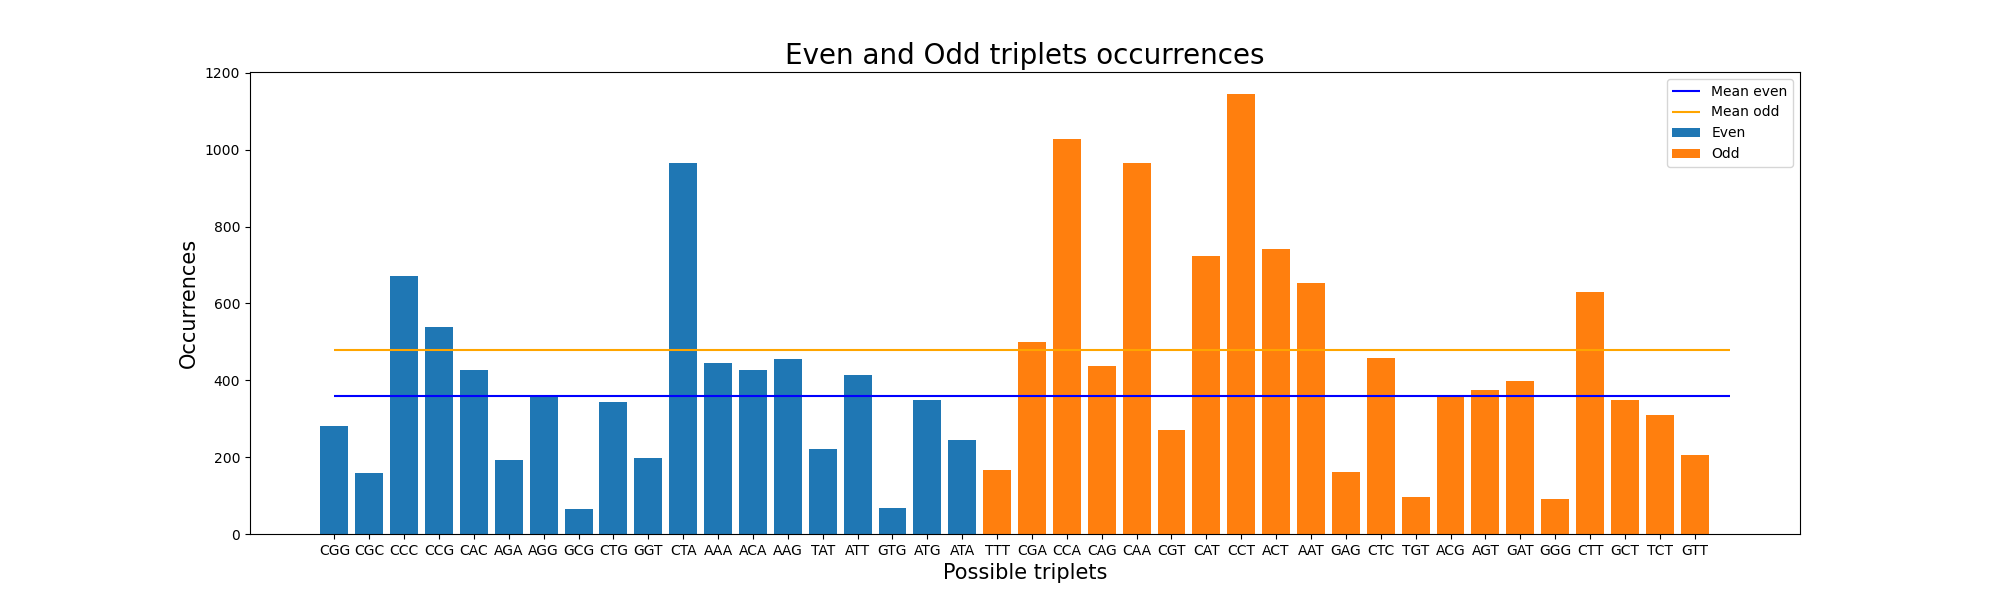

In [40]:
# exercise 6

even = df[df['Even'] == True]['Count']
odd =  df[df['Even'] == False]['Count']

fig, ax = plt.subplots(figsize = (20,6))

ax.bar(even.index, even, label = 'Even')
ax.hlines(even.mean(), 0, len(df), label='Mean even', color='b')
ax.bar(odd.index, odd, label = 'Odd')
ax.hlines(odd.mean(), 0, len(df), label='Mean odd', color='orange')

plt.xlabel('Possible triplets', fontsize = 15)
plt.ylabel('Occurrences', fontsize = 15)
plt.title('Even and Odd triplets occurrences', fontsize = 20)
plt.legend()
plt.show()

In [43]:
# exercise 7

std = (df['Count']-df['Count'].mean())/df['Count'].std()
df['Standard'] = std
assert (df['Standard'].mean() - 0) < 1e-10
assert (df['Standard'].std() - 1) < 1e-10

df.head()

,Count,Even,Standard
CGG,282,True,-0.519627
TTT,167,False,-0.946540
CGC,160,True,-0.972526
CGA,499,False,0.285939
CCC,672,True,0.928164


In [50]:
# exercise 8

with pm.Model() as my_model:
    
    mu_even = pm.Normal('mu_even', 0, 2)
    mu_odd = pm.Normal('mu_odd', 0, 2)
    
    even = ('even', mu_even, 1, observed = df[df['Even'] == True]['Standard'])
    odd = ('odd', mu_odd, 1, observed = df[df['Even'] == False]['Standard'])
    
    post = pm.sample(return_inferencedata=False)

<class 'NameError'>: name 'pm' is not defined

In [ ]:
with my_model:
    pm.plot_posterior(post)